# Ford Go-Bike System Data Exploration
## by Sony Okpara

## Introduction
This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Features of the data include member birth year, user type, trip duration, among other trip attributes. The dataset can be downloaded from [here](https://www.google.com/url?q=https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv&sa=D&source=editors&ust=1658556134051083&usg=AOvVaw14b1G3lSqe0xCQM6x9DQTH).


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Load the dataset 

I begin by loading the dataset into a pandas data frame to prepare it for the explonatory task ahead. Thereafter, using various methods I try to understand the structure and composition of the dataset. 

In [3]:
# loading the dataset 
tripdata_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
# viewing the dataset to understand its structure and composition
print(tripdata_df.shape)
print(tripdata_df.info())
tripdata_df.head()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# descriptive statistics for numeric variables
tripdata_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# checking for entries with null
tripdata_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# checking for duplicated entries
tripdata_df.duplicated().sum()

0

### Data Cleaning
Upon the preceeding assessment of the dataset, I observed some issues outlined below.
#### Quality Issues
+ Missing values in some features (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year and member_gender)
+ Wrong data types for some features
    + start_station_id, end_station_id and bike_id should be of type object(string), not float
    + start_time and end_time should be of type datetime, not object
    + member_birth_year should be of type int, not float.
+ Birth year of 1878 is not realistic
+ Duration should be in minutes for easier understanding instead of second.
#### Tidiness Issue
+ No age feature but member birth year was given instead
+ No information about days or months but start and end times were given  

Next, I will fix all the issues as identified above.

In [7]:
# firstly, I make a copy of the original dataset 
tripdata_copy = tripdata_df.copy()

### Issue #1

#### Define
Drop missing values

#### Code

In [8]:
# dropping all entries with missing/null values
tripdata_copy.dropna(inplace=True)

#### Test

In [9]:
# confirming that there are no entries with missing values
tripdata_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Issue #2

#### Define
+ Convert start_station_id, end_station_id and bike_id to object(string)
+ Convert start_time and end_time to datetime
+ Convert member_birth_year to int

#### Code

In [10]:
# convert start_station_id, end_station_id and bike_id to object
columns = ['start_station_id', 'end_station_id', 'bike_id']
for col in columns:
    tripdata_copy[col] = tripdata_copy[col].astype(str)

In [11]:
# convert start_time and end_time to datatime
columns = ['start_time', 'end_time']
for col in columns:
    tripdata_copy[col] = pd.to_datetime(tripdata_copy[col])

In [12]:
# convert member_birth_year to int
tripdata_copy['member_birth_year'] = tripdata_copy['member_birth_year'].astype(int)

#### Test

In [13]:
# confirming data type conversion
tripdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage

### Issue #3

#### Define
Convert duration from seconds to minutes using $minute = {seconds \over 60}$ formula

#### Code

In [14]:
# convert duration in seconds to minutes
time_in_minutes = tripdata_copy['duration_sec'] / 60
tripdata_copy.insert(loc = 1, column = 'duration_min', value = time_in_minutes)
tripdata_copy['duration_min'] = tripdata_copy['duration_min'].astype(int)

#### Test

In [15]:
tripdata_copy.head()

,duration_sec,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,869,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,1030,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,608,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,26,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,29,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


### Issue #4

#### Define 
+ Create **age** column by subracting **member_birth_year** from 2019
+ Remove all members of **age > 80**

#### Code

In [16]:
# creating age column
ages = 2019 - tripdata_copy['member_birth_year']
tripdata_copy.insert(loc = 15, column = 'member_age', value = ages)

In [17]:
tripdata_copy = tripdata_copy.query('member_age <= 80')

#### Test 

In [18]:
tripdata_copy.head(5)

,duration_sec,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_age,member_gender,bike_share_for_all_trip
0,52185,869,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
2,61854,1030,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,47,Male,No
3,36490,608,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,30,Other,No
4,1585,26,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,45,Male,Yes
5,1793,29,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,60,Male,No


### Issue #5

#### Define
Create three columns: **start_time_weekday**, **start_time_hour**, **end_time_hour** from the start_time and end_time columns

#### Code

In [19]:
# compute start_time_weekday
start_time_weekdays = tripdata_copy['start_time'].dt.strftime('%A')
tripdata_copy.insert(loc = 3, column = 'start_time_weekday', value = start_time_weekdays)

# compute start_time_hour
start_time_hours = tripdata_copy['start_time'].dt.hour
tripdata_copy.insert(loc = 4, column = 'start_time_hour', value = start_time_hours)

# compute end_time_hour
end_time_hours = tripdata_copy['end_time'].dt.hour
tripdata_copy.insert(loc = 6, column = 'end_time_hour', value = end_time_hours)

#### Test

In [20]:
# confirming start_time_weekday and start_time_month columns addition
tripdata_copy.head()

,duration_sec,duration_min,start_time,start_time_weekday,start_time_hour,end_time,end_time_hour,start_station_id,start_station_name,start_station_latitude,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_age,member_gender,bike_share_for_all_trip
0,52185,869,2019-02-28 17:32:10.145,Thursday,17,2019-03-01 08:01:55.975,8,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
2,61854,1030,2019-02-28 12:13:13.218,Thursday,12,2019-03-01 05:24:08.146,5,86.0,Market St at Dolores St,37.769305,...,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,47,Male,No
3,36490,608,2019-02-28 17:54:26.010,Thursday,17,2019-03-01 04:02:36.842,4,375.0,Grove St at Masonic Ave,37.774836,...,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,30,Other,No
4,1585,26,2019-02-28 23:54:18.549,Thursday,23,2019-03-01 00:20:44.074,0,7.0,Frank H Ogawa Plaza,37.804562,...,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,45,Male,Yes
5,1793,29,2019-02-28 23:49:58.632,Thursday,23,2019-03-01 00:19:51.760,0,93.0,4th St at Mission Bay Blvd S,37.770407,...,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,60,Male,No


Finally, I will convert the **member_gender**, **user_type**, **weekdays** and **bike_share_for_all_trip** columns to categorical types and drop excess columns which are not quiet relevant for my research questions.

In [21]:
# convert member_gender, user_type and bike_share_for_all_trip to categorical types
category_types = ['member_gender', 'user_type', 'bike_share_for_all_trip']
for col in category_types:
    tripdata_copy[col] = tripdata_copy[col].astype('category')
    
# convert weekdays to ordered categories
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays_order)
tripdata_copy['start_time_weekday'] = tripdata_copy['start_time_weekday'].astype(weekdays);

In [22]:
# Dropping excess columns from the cleaned dataset 
excess_columns = ['member_birth_year', 'start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude']
tripdata_copy.drop(excess_columns, axis=1, inplace=True)

In [23]:
print(tripdata_copy.info())
tripdata_copy.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174760 non-null int64
duration_min               174760 non-null int64
start_time                 174760 non-null datetime64[ns]
start_time_weekday         174760 non-null category
start_time_hour            174760 non-null int64
end_time                   174760 non-null datetime64[ns]
end_time_hour              174760 non-null int64
start_station_id           174760 non-null object
start_station_name         174760 non-null object
end_station_id             174760 non-null object
end_station_name           174760 non-null object
bike_id                    174760 non-null object
user_type                  174760 non-null category
member_age                 174760 non-null int64
member_gender              174760 non-null category
bike_share_for_all_trip    174760 non-null category
dtypes: category(4), datetime64[ns](2), int64(5), object(5)
memory usa

,duration_sec,duration_min,start_time,start_time_weekday,start_time_hour,end_time,end_time_hour,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip
0,52185,869,2019-02-28 17:32:10.145,Thursday,17,2019-03-01 08:01:55.975,8,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,35,Male,No
2,61854,1030,2019-02-28 12:13:13.218,Thursday,12,2019-03-01 05:24:08.146,5,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,47,Male,No
3,36490,608,2019-02-28 17:54:26.010,Thursday,17,2019-03-01 04:02:36.842,4,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,30,Other,No
4,1585,26,2019-02-28 23:54:18.549,Thursday,23,2019-03-01 00:20:44.074,0,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,45,Male,Yes
5,1793,29,2019-02-28 23:49:58.632,Thursday,23,2019-03-01 00:19:51.760,0,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,60,Male,No


In [24]:
tripdata_copy.describe()

,duration_sec,duration_min,start_time_hour,end_time_hour,member_age
count,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000
mean,704.309630,11.246550,13.456100,13.609527,34.125223
std,1643.031657,27.385062,4.735548,4.749307,9.877739
min,61.000000,1.000000,0.000000,0.000000,18.000000
25%,323.000000,5.000000,9.000000,9.000000,27.000000
50%,511.000000,8.000000,14.000000,14.000000,32.000000
75%,789.000000,13.000000,17.000000,18.000000,39.000000
max,84548.000000,1409.000000,23.000000,23.000000,80.000000


In [1]:
# function to display title and axes labels of the distributions
def displayChartLabels(title, xlabel, ylabel):
    """Displays the title, x and y labels for the chart"""
    plt.title(title, fontsize = 14, fontweight = 'bold', y = 1.05)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()

### What is the structure of your dataset?

+ There are 174,760 trip data entries with 16 columns.
+ The dataset contains both numeric and non-numeric data types with some non-numeric types bein categorical in nature.

### What is/are the main feature(s) of interest in your dataset?

I will be focusing on exploring the impact of age, user type, and duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that age, user type, weekday and trip duration will have a great toll on the hiring decisions by members. Though gender could also impact greatly but to a much lower extent.

## Univariate Exploration


I will start by looking at the main variables of interest: age, user type and time, also gender and weekday.

### What is the dorminant age group of members? 

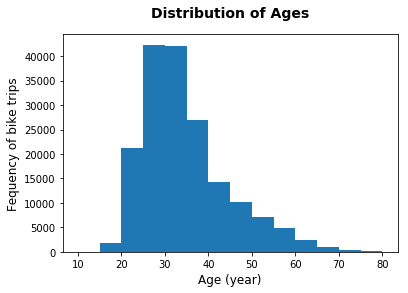

In [25]:
# histogram to show age distribution
bin_edges = np.arange(10, tripdata_copy['member_age'].max()+5, 5)
plt.hist(data = tripdata_copy, x = 'member_age', bins = bin_edges)
displayChartLabels(title='Distribution of Ages', xlabel='Age (year)', ylabel='Fequency of bike trips')

**Observation**: Most bike users are between the ages 20 and 40 years with the dorminant age group being between 25 and 30.

### Which gender constitutes the largest share of members?

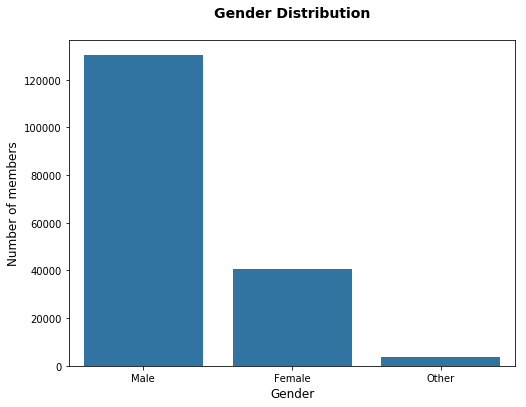

In [26]:
# bar chart to show gender distribution
plt.figure(figsize=[8,6])
sorted_counts = tripdata_copy['member_gender'].value_counts()
base_color = sb.color_palette()[0]
sb.countplot(data = tripdata_copy, x = 'member_gender', color = base_color, order = sorted_counts.index)
displayChartLabels(title='Gender Distribution', xlabel='Gender', ylabel='Number of members')

**Observation**: Males make more trips than females with Other gender being the least.

### Which user type made the most trip?

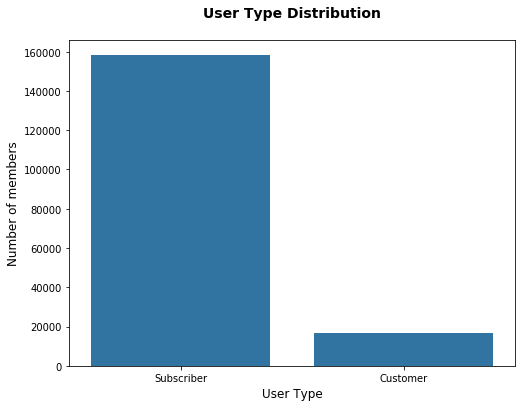

In [27]:
# bar chart to show user type distribution
plt.figure(figsize = [8, 6])
sorted_counts = tripdata_copy['user_type'].value_counts()
base_color = sb.color_palette()[0]
sb.countplot(data = tripdata_copy, x = 'user_type', color = base_color, order = sorted_counts.index)
displayChartLabels(title='User Type Distribution', xlabel='User Type', ylabel='Number of members')

**Observation**: Subscribes are the most user type of the system.

### On which hour(s) of the day do users hire bike the most?

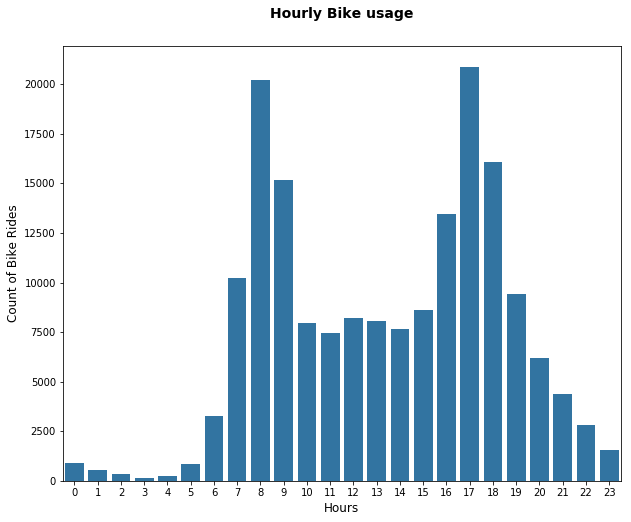

In [28]:
# hourly bike usage
plt.figure(figsize = [10,8])
base_color = sb.color_palette()[0]
sb.countplot(data = tripdata_copy, x = 'start_time_hour', color = base_color)
displayChartLabels(title='Hourly Bike usage', xlabel='Hours', ylabel='Count of Bike Rides')

**Observation**: Trips are mostly made in the morning from 7-9am and in the evening from 4-6pm. In all, trips are highest at 8am and 5pm.

### On which weekday do users start hiring bikes the most?

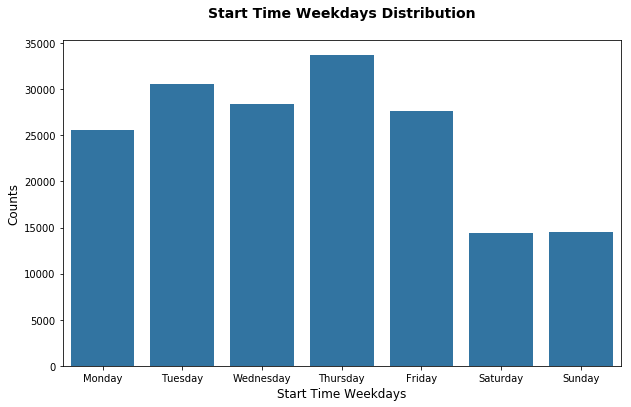

In [29]:
# bar chart showing the distribution of weekdays
plt.figure(figsize = [10,6])
sorted_counts = tripdata_copy['start_time_weekday'].value_counts()
base_color = sb.color_palette()[0]
sb.countplot(data = tripdata_copy, x = 'start_time_weekday', color = base_color)
displayChartLabels(title='Start Time Weekdays Distribution', xlabel='Start Time Weekdays', ylabel='Counts')

**Observation**: Users make use of the system mostly on working days with Thursdays recording over 30,000 trips.

### Which start station recorded the highest patronage?

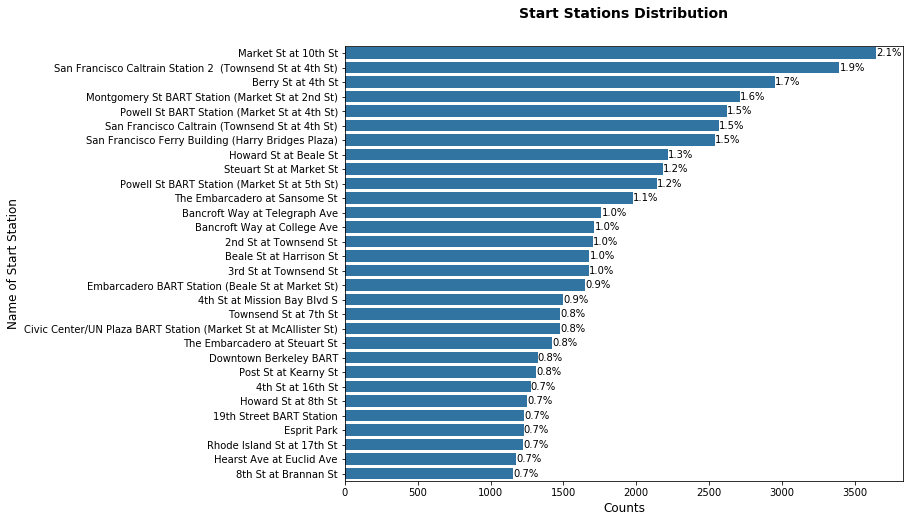

In [34]:
# bar chart showing the distribution of months
plt.figure(figsize = [10,8])
sorted_counts = tripdata_copy['start_station_name'].value_counts().head(30)
base_color = sb.color_palette()[0]
sb.countplot(data = tripdata_copy, y = 'start_station_name', color = base_color, order = sorted_counts.index)

# computing bin % values
for i in range(sorted_counts.shape[0]):
  count = sorted_counts[i]
  pct_value = 100 * count / tripdata_copy.shape[0]
  pct_str = '{:0.1f}%'.format(pct_value)
  plt.text(count+1, i, pct_str, va = 'center');
    
displayChartLabels(title='Start Stations Distribution', xlabel='Counts', ylabel='Name of Start Station')

**Observation**: The most popular start station is **Market St at 10th St** recording about **2.1%** of the total trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

+ Subscribers were the most users of the system.
+ Thursdays were the busiest days at the stations. 
+ Age values were quiet unusual for me as users older than 100 years could ride bikes. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Except the age values which had some unrealistic birth years such as 1878, 1923, etc., other data points were quiet normal. I therefore filtered the dataset to include ages 80 or less.

## Bivariate Exploration
To begin with, I want to look at the relationship between user type and gender.

### What is the relatioship between gender and user type?

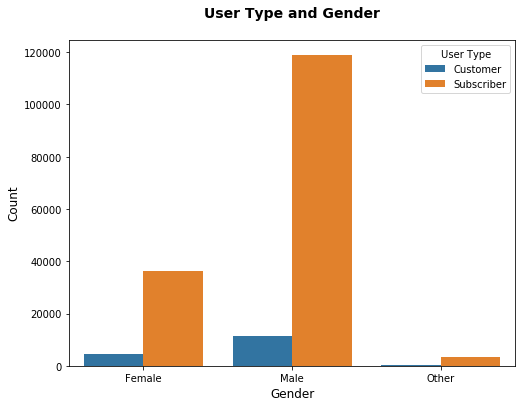

In [35]:
# clustered bar chart for gender and user type
plt.figure(figsize = [8, 6])
sb.countplot(data = tripdata_copy, x = 'member_gender', hue = 'user_type')
plt.legend(title = 'User Type');
displayChartLabels(title='User Type and Gender', xlabel='Gender', ylabel='Count')

**Observation**: Males, who are either subscribers or customers use the system the most than females and others.   

### What is the relationship between Age and Gender?

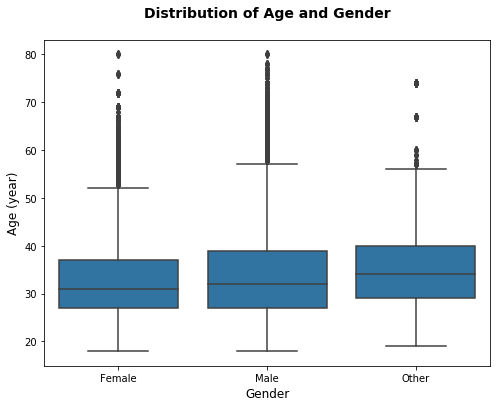

In [36]:
# box plot for age and gender
plt.figure(figsize = [8,6])
base_color = sb.color_palette()[0]
sb.boxplot(data = tripdata_copy, x = 'member_gender', y = 'member_age', color = base_color)
displayChartLabels(title='Distribution of Age and Gender', xlabel='Gender', ylabel='Age (year)')

**Observations**:  
+ Obviously, there are more females than males.
+ The average age of males is ~34 years which is higher than that of females which is ~32 years. 
+ 75% of females and males are approximately 38 and 40 years of age respectively.

### What is the relationship between user type and start time hour?

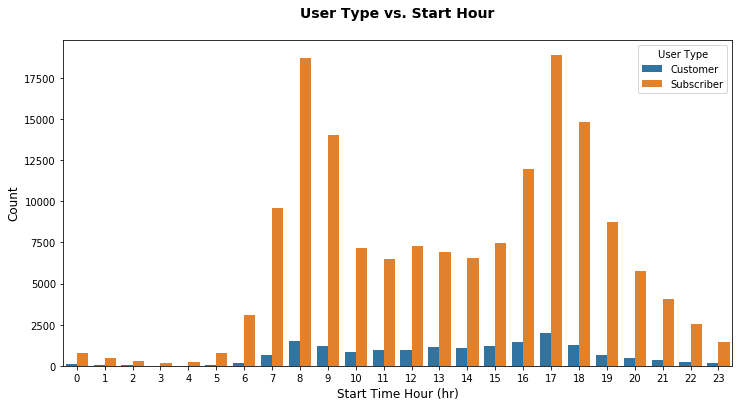

In [37]:
# clustered bar chart 
plt.figure(figsize = [12, 6])
sb.countplot(data = tripdata_copy, x = 'start_time_hour', hue = 'user_type')
plt.legend(title = 'User Type');
displayChartLabels(title='User Type vs. Start Hour', xlabel='Start Time Hour (hr)', ylabel='Count')

**Observation**: Subscribers make trips mostly in the morning between 7am and 9am with a peak at 8am. In the evening, they make use of the system mostly between 4pm and 6pm with a peak at 5pm.

### What is the relationship between age of riders and duration of trip?

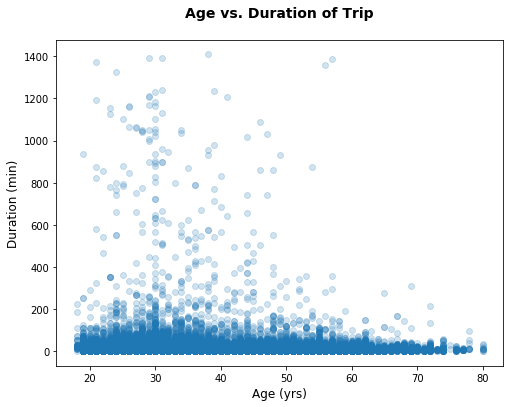

In [38]:
# scatter plot for age and hour 
plt.figure(figsize = [8,6])
plt.scatter(data = tripdata_copy, x = 'member_age', y = 'duration_min', alpha = 1/5)
displayChartLabels(title='Age vs. Duration of Trip', xlabel='Age (yrs)', ylabel='Duration (min)')

**Observation**: Users about 60 years and below spend longer trip duration. Most users spend less than 200 minutes on a trip.

### What is the relationship between age and user type?

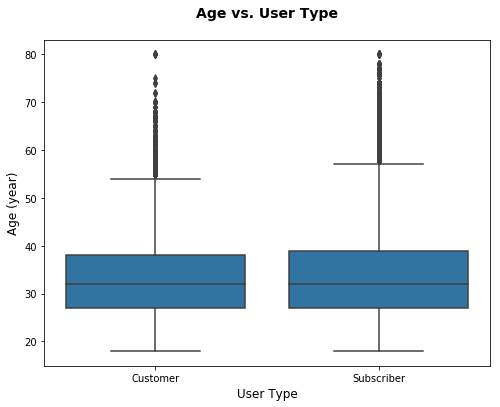

In [39]:
# box plot for age and user type
plt.figure(figsize = [8,6])
base_color = sb.color_palette()[0]
sb.boxplot(data = tripdata_copy, y ='member_age', x = 'user_type', color = base_color)
displayChartLabels(title='Age vs. User Type', xlabel='User Type', ylabel='Age (year)')

**Observations**: 
+ The average age of subscribers is higher than customers
+ 75% of subscribers are ~40 years of age
+ 75% of customers are ~38 years of age
+ The minimum age of users (customer and subscriber) is below 20 years

### On which weekdays are the longest trip durations made?

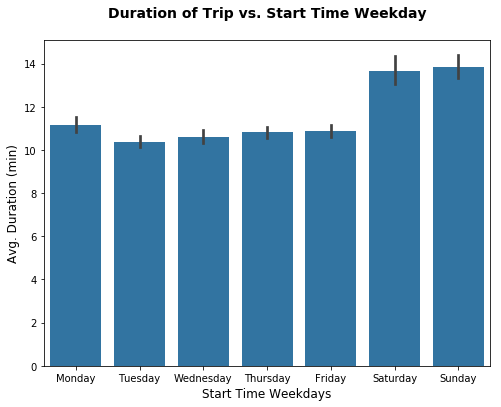

In [40]:
# adaptation of bar chart for weekdays
base_color = sb.color_palette()[0]
plt.figure(figsize = [8,6])
sb.barplot(data = tripdata_copy, x='start_time_weekday', y='duration_min', color=base_color)
displayChartLabels(title='Duration of Trip vs. Start Time Weekday',
                   xlabel='Start Time Weekdays',
                   ylabel='Avg. Duration (min)')

**Observation**: The average trip duration is high on weekends, Sunday being the highest. This is probably because riders don't go to work and hence have ample time to spare. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Subscribers are the most users of the system across all genders and they mostly use it to commute to and from work in the morning at around 8am and evening at around 5pm. However, they spend shorter trip duration than customers. Also, about 75% of subcribers are males. I also observed that duration of trip decreases with age because younger users spend more time than older ones. On weekends, trip duration is highest on Sudays and mostly used by cusomers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

What is quiet interesting is the fact that the average age of subscribers is higher than customers. 

## Multivariate Exploration


### What is the relationship between age, trip duration and user type?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


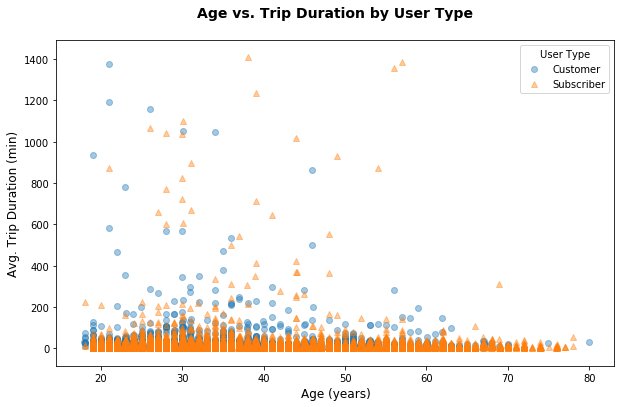

In [45]:
# scatter plot for age, trip duration and user type
plt.figure(figsize = [10, 6])
sample = np.random.choice(tripdata_copy.shape[0], 50000, replace=False)
tripdata_sub = tripdata_copy.loc[sample]
tripdata_sub.shape
user_type_markers = [['Customer', 'o'], ['Subscriber', '^']]

for user_type, marker in user_type_markers:
    plot_data = tripdata_sub.loc[tripdata_sub['user_type'] == user_type]
    sb.regplot(data = plot_data, 
               x = 'member_age', 
               y = 'duration_min', 
               x_jitter = 0.04, 
               marker = marker, 
               fit_reg = False, 
               scatter_kws = {'alpha':0.4})

plt.legend(['Customer', 'Subscriber'], title = 'User Type');
displayChartLabels(title='Age vs. Trip Duration by User Type', xlabel='Age (years)', ylabel='Avg. Trip Duration (min)');


**Observations**:  
+ Older users are mostly subscribers and spent relatively shorter trip durations.
+ Younger customers relatively spend more trip duration than younger subscribers. 

### What is the average trip duration per weekdays made by each user type?

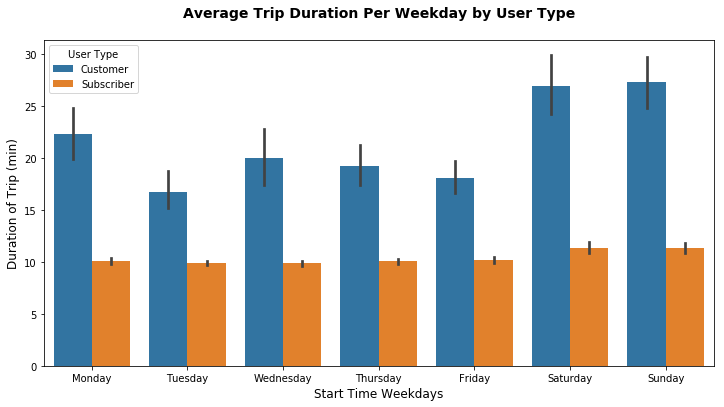

In [46]:
plt.figure(figsize=[12,6])
sb.barplot(data = tripdata_copy, x = 'start_time_weekday', y = 'duration_min', hue = 'user_type')
plt.legend(title = 'User Type');
displayChartLabels(title='Average Trip Duration Per Weekday by User Type', xlabel='Start Time Weekdays', ylabel='Duration of Trip (min)');

**Observation**: On each weekday, subscribers make shorter trips than customers. 

### What is the nature of trip duration by gender in terms of user type?

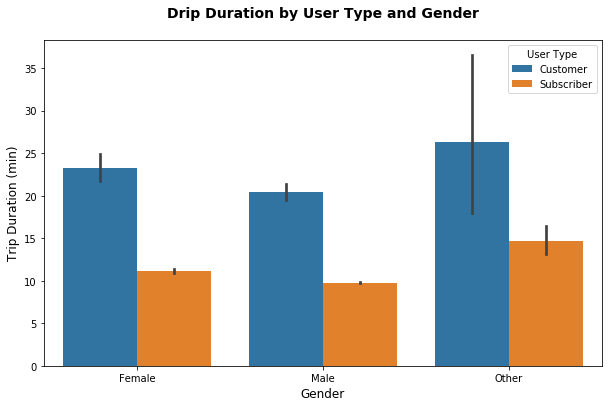

In [47]:
# adapted clustered bar chart for trip duration by gender and user type
plt.figure(figsize = [10, 6])
sb.barplot(data = tripdata_copy, x = 'member_gender', y = 'duration_min', hue = 'user_type')
plt.legend(title = 'User Type');
displayChartLabels(title='Drip Duration by User Type and Gender', 
                   xlabel='Gender', ylabel='Trip Duration (min)');

**Observation**: Customers spend longer trip duration than subscribers across all gender. 

In [25]:
# save the cleaned data frame for the explanatory analysis phase
cleaned_tripdata = tripdata_copy.to_csv('201902-fordgobike-tripdata-cleaned.csv', index=False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This part further consolidates the findings from the bivariate and univariate visualizations. Firstly, subscribers are the dorminant users of the biking system and tend to spend much shorter trip duration than customers irrespective of their gender. Trip duration is also inversely proportional to age, in other words younger users, whether customer or subscriber, spend longer trip duration than older users. 

### Were there any interesting or surprising interactions between features?

I did not bump into any surprising interactions between features except for the fact female customers spend higher trip duration than male customers.

## Conclusions
The focus of this project was to explore the Ford Go-Bike System. My main features of interest were age, user type, and duration. The exploration was done in three areas of visualization; univariate, bivariate and multivariate. In each step of the visualizations, I used the **Question-Visualization-Observation** framework to communicate my findings. The main insights are listed below.
+ Most bike users are between the ages 20 and 40 years with the dorminant age group being between 25 and 30.
+ The average trip duration is high on weekends, Sunday being the highest. This is probably because riders don't go to work and hence have ample time to spare.
+ Customers spend longer trip duration than subscribers across all gender.
+ Subscribers make trips mostly at 8am in the morning and 6pm in the evening.
+ Usage of the system is mostly in the morning from 7-9am and in the evening from 4-6pm.
